<a href="https://colab.research.google.com/github/Aleksandra-Shukova/OpenCV/blob/main/OpenCV_pz_1_full_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Ai learning
  - Python
    - OpenCV

practic 1

Разработать программу, которая будет выполнять следующие
действия:
- Читать видео из файла
- Распознавать позицию яркой точки
- Отображать на экране историю (траекторию движения яркой точки с начала видео)
- Финальный кадр c траекторией поместить в файл result.jpg
- Полученную картинку поместить в папку result


Результаты помеcтить в gitlab в проект
Прислать ссылку на проект
https://gitlab.mai.ru/Your_Mai_Id/dpo_ai_practic1.git

Файл видео можно скачать по ссылке:
https://drive.google.com/file/d/1JSUjrjwUTIZBEgTDhw8i6AUphxDJXZKi/view?usp=drive_link

This part for Google Colab: to work with files on your Goggle Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive') #name could be anything

Now you can create files inside your Google Drive, but:
- f=open("/gdrive/My Drive/Colab Notebooks/filename.txt","w") works only if dirrectory exists
- it automatically creates file, but not a folder

Create needed folders at Google Drive

In [ ]:
f = open("/gdrive/My Drive/Colab Notebooks/FolderNotExists/test.txt", 'w') #create text file there
f.write("content from Google Colab")
f.close()

FileNotFoundError: ignored

There are no errors if folder exists at Google Drive

In [ ]:
f = open("/gdrive/My Drive/Colab Notebooks/Ai learning/OpenCV practice 1/test1.txt", 'w') #create text file there
f.write("""content from Google Colab
Created by full path:
/gdrive/My Drive/Colab Notebooks/Ai learning/OpenCV practice 1/test1.txt""")
f.close()

To not write full path every time, there are command to set folder we work in:

%cd path_to_folder

In [ ]:
%cd /gdrive/My Drive/Colab Notebooks/Ai learning/OpenCV practice 1

/gdrive/My Drive/Colab Notebooks/Ai learning/OpenCV practice 1


In [ ]:
f = open("test2.txt", 'w') #create text file there
f.write("""content from Google Colab
Created by short path
After useing %cd""")
f.close()

In [ ]:
f = open("test1.txt", "r") #r read, a write to end
myText1 = f.read()
f.close()

f = open("test2.txt", "r") #r read, a write to end
myText2 = f.read()
f.close()

print(myText1)
print(myText2)

content from Google Colab
Created by full path:
/gdrive/My Drive/Colab Notebooks/Ai learning/OpenCV practice 1/test1.txt
content from Google Colab
Created by short path
After useing %cd


End of part about Google Colab

Same thing fast:

In [ ]:
#add google drive to colab
from google.colab import drive
drive.mount('/gdrive') #name could be anything

#set working folder
%cd /gdrive/My Drive/Colab Notebooks/Ai learning/OpenCV practice 1

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/Ai learning/OpenCV practice 1


In [ ]:
import cv2 #OpenCv work with images
import numpy as np #never used here

#cv2.imshow("Frame", frame)
#disabled in google colab so we import another function:
from google.colab.patches import cv2_imshow
#cv2_imshow(frame)
#it draws one frame, just like print('text')
#to not die under ton of screenshots
from google.colab import output
#output.clear()
#will delete picture before draw a new one
#to give programm time to draw a picture
import time
#time.sleep(1) to sleep for 1 sec
#but apparently cv2 has a function
#.waitKey() that used as delay
#it is lagging more,
#so i took more casual approach time.sleep()

#for easy result showing
def myShow(xFrame):
    '''shows video frame by frame'''
    output.clear()
    cv2_imshow(xFrame)
    time.sleep(0.05)
    #cv2.waitKey(50) # 33 мс сон (~30 кадров в секунду)

myVideo = "video_output.mp4"

#trajectory of white dot
#it will be a list, but list of "tuples"
centers = []

In [ ]:
print( type( (1, 2) ) )
myList = [ (7,8), (1,4) ]
print( myList[1] )
print( myList )

<class 'tuple'>
(1, 4)
[(7, 8), (1, 4)]


**show original video**

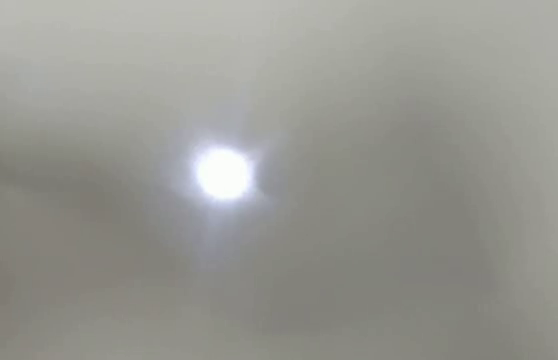

Video ended....


In [ ]:
#open video
cap = cv2.VideoCapture(myVideo)
if not cap.isOpened():
    print("Error open video!")
    exit(1)

#show the video
while cap.isOpened():
    ret, frame = cap.read() #seems it return two things
    if not ret:
        print("Video ended....")
        break
    #cv2.imshow("Frame", frame) #disabled in google colab
    myShow(frame)

cap.release()

**make grey video**

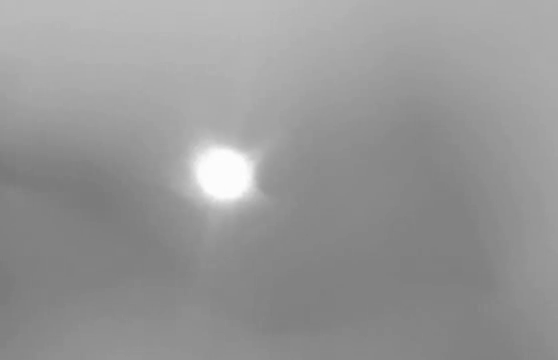

Video ended....


In [ ]:
#open video
cap = cv2.VideoCapture(myVideo)
if not cap.isOpened():
    print("Error open video!")
    exit(1)

#show the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Video ended....")
        break
    #cv2.imshow("Frame", frame) #disabled in google colab
    #myShow(frame)

    #перевод изображения в черно-белое
    grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    myShow(grey)

cap.release()

**find bright spot**

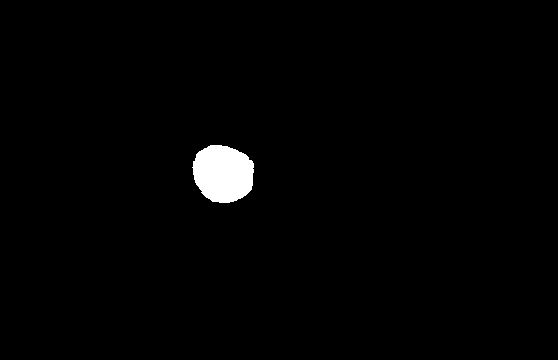

Video ended....


In [ ]:
#open video
cap = cv2.VideoCapture(myVideo)
if not cap.isOpened():
    print("Error open video!")
    exit(1)

#show the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Video ended....")
        break
    #cv2.imshow("Frame", frame) #disabled in google colab
    #myShow(frame)

    #перевод изображения в черно-белое
    grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #myShow(grey)

    #использование функции threshold
    #для определения светлого пятна
    _, threshold = cv2.threshold(grey, thresh=210, maxval=255, type=cv2.THRESH_BINARY)
    myShow(threshold)

cap.release()

About SyntaxError: positional argument follows keyword argument in Python

You cant use keyword arguments before positional:

Correct call of function func(a, b, c):
- all positional
 - func(1, 2, 3)
- keywords after positional
 - func(1, b=2, c=3)
 - func(1, 2, c=3)
- all keywords
 - func(a=1, b=2, c=3)

Incorrect call:
- func(a=1, b=2, 3)
- func(a=1, 2, c=3)
- func(1, b=2, 3)

Thats why
- _, threshold = cv2.threshold(gray, thresh=210, maxval=255, cv2.THRESH_BINARY)

doesn't work, but
- _, threshold = cv2.threshold(gray, thresh=210, maxval=255, type=cv2.THRESH_BINARY)

Does

In [ ]:
help(cv2.threshold)

Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst]) -> retval, dst
    .   @brief Applies a fixed-level threshold to each array element.
    .   
    .   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
    .   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
    .   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
    .   values. There are several types of thresholding supported by the function. They are determined by
    .   type parameter.
    .   
    .   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
    .   above values. In these cases, the function determines the optimal threshold value using the Otsu's
    .   or Triangle algorithm and uses it instead of the specified thresh.
    .   
    .   @note Currently, the Otsu's and Triangle methods a

**find center of bright spot**

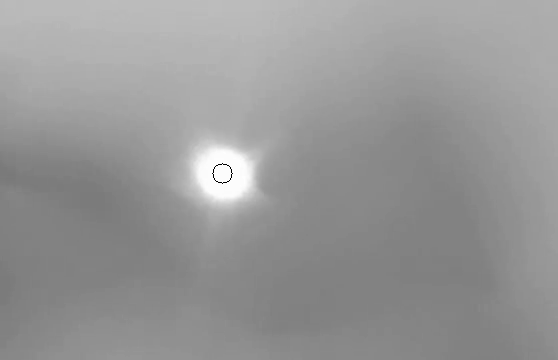

Video ended....


In [ ]:
#open video
cap = cv2.VideoCapture(myVideo)
if not cap.isOpened():
    print("Error open video!")
    exit(1)

#show the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Video ended....")
        break
    #cv2.imshow("Frame", frame) #disabled in google colab
    #myShow(frame)

    #перевод изображения в черно-белое
    grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #myShow(grey)

    #использование функции threshold
    #для определения светлого пятна
    _, threshold = cv2.threshold(grey, thresh=210, maxval=255, type=cv2.THRESH_BINARY)
    #myShow(threshold)

    #определение центра масс пятна
    #M is a dictionary for mathematic Mambo-jambo
    #it works only with threshold: black and white, not grey
    M = cv2.moments(threshold)
    # вычисляете координаты центра масс
    cX = int( M["m10"] / M["m00"] )
    cY = int( M["m01"] / M["m00"] )

    #draw circle on image,
    #in this case Grey, but it works fine with original
    cv2.circle(grey, center=( cX, cY ), radius=10, color=-1, thickness=1)
    myShow(grey)

cap.release()

In [ ]:
print(M)

{'m00': 721905.0, 'm10': 160842780.0, 'm01': 125071125.0, 'm20': 36011034210.0, 'm11': 27881759670.0, 'm02': 21822526425.0, 'm30': 8101328924250.0, 'm21': 6245758466280.0, 'm12': 4867410372570.0, 'm03': 3834146440725.0, 'mu20': 174740129.57612506, 'mu11': 15506571.978102362, 'mu02': 153766257.43553773, 'mu30': 88138483.62920427, 'mu21': -117100932.64138904, 'mu12': -92506098.03909925, 'mu03': 80506944.2631798, 'nu20': 0.0003352992282482881, 'nu11': 2.975470848995321e-05, 'nu02': 0.00029505361804314345, 'nu30': 1.990514978445968e-07, 'nu21': -2.6446014364540715e-07, 'nu12': -2.0891529575102203e-07, 'nu03': 1.8181646861425683e-07}


In [ ]:
help(cv2.moments)

Help on built-in function moments:

moments(...)
    moments(array[, binaryImage]) -> retval
    .   @brief Calculates all of the moments up to the third order of a polygon or rasterized shape.
    .   
    .   The function computes moments, up to the 3rd order, of a vector shape or a rasterized shape. The
    .   results are returned in the structure cv::Moments.
    .   
    .   @param array Raster image (single-channel, 8-bit or floating-point 2D array) or an array (
    .   \f$1 \times N\f$ or \f$N \times 1\f$ ) of 2D points (Point or Point2f ).
    .   @param binaryImage If it is true, all non-zero image pixels are treated as 1's. The parameter is
    .   used for images only.
    .   @returns moments.
    .   
    .   @note Only applicable to contour moments calculations from Python bindings: Note that the numpy
    .   type for the input array should be either np.int32 or np.float32.
    .   
    .   @sa  contourArea, arcLength



In [ ]:
help(cv2.circle)

Help on built-in function circle:

circle(...)
    circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img
    .   @brief Draws a circle.
    .   
    .   The function cv::circle draws a simple or filled circle with a given center and radius.
    .   @param img Image where the circle is drawn.
    .   @param center Center of the circle.
    .   @param radius Radius of the circle.
    .   @param color Circle color.
    .   @param thickness Thickness of the circle outline, if positive. Negative values, like #FILLED,
    .   mean that a filled circle is to be drawn.
    .   @param lineType Type of the circle boundary. See #LineTypes
    .   @param shift Number of fractional bits in the coordinates of the center and in the radius value.



**save and draw a trajectory of spot**

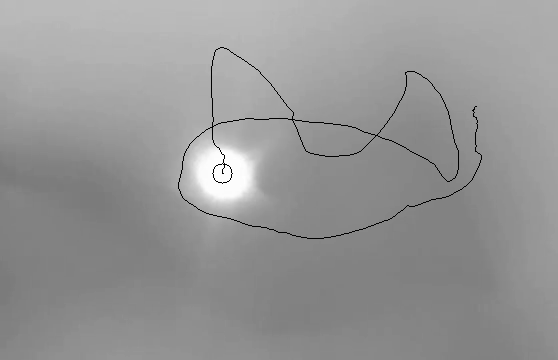

Video ended....
End of programm


In [ ]:
#open video
cap = cv2.VideoCapture(myVideo)
if not cap.isOpened():
    print("Error open video!")
    exit(1)

#show the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Video ended....")
        break
    #cv2.imshow("Frame", frame) #disabled in google colab
    #myShow(frame)

    #перевод изображения в черно-белое
    grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #myShow(grey)

    #использование функции threshold
    #для определения светлого пятна
    _, threshold = cv2.threshold(grey, thresh=210, maxval=255, type=cv2.THRESH_BINARY)
    #myShow(threshold)

    #определение центра масс пятна
    #M is a dictionary for mathematic Mambo-jambo
    #it works only with threshold: black and white, not grey
    M = cv2.moments(threshold)
    # вычисляете координаты центра масс
    cX = int( M["m10"] / M["m00"] )
    cY = int( M["m01"] / M["m00"] )

    #draw circle on image,
    #in this case Grey, but it works fine with original
    cv2.circle(grey, center=( cX, cY ), radius=10, color=-1, thickness=1)
    #myShow(grey)

    #добавляете координаты центра
    #светового пятна в список
    centers.append( ( cX, cY ) )

    #для каждого кадра рисуем
    #координаты центров с помощью line
    #isnt range starts with 0?
    #there was bad example, i fixed
    #for i in range(1, len(centers)): #this was a BS, you need N-1 lines to connect dots
        #cv2.line(gray, centers[i-1], centers[i], color=0, thickness=1)
    for i in range( len(centers)-1 ): #need N-1 lines to connect dots
        cv2.line(grey, centers[i], centers[i+1], color=0, thickness=1)

    myShow(grey)
    #waitKey meant to work as time.sleep
    #cv2.waitKey(33) # 33 мс сон (~30 кадров в секунду)

cv2.waitKey(0) #waiting forever,
#but unclear for what
#i bet if it isnt mentioned
#must be Any Key
#and probably cv2 starts some window
#so it would be closed, who knows
cap.release()

print("End of programm")

In [ ]:
for i in range(4):
    print(i)
print( range(4) )

0
1
2
3
range(0, 4)


In [ ]:
help(cv2.waitKey)

#there is no keyboard in colab,
#so i cant figure it for a now

Help on built-in function waitKey:

waitKey(...)
    waitKey([, delay]) -> retval
    .   @brief Waits for a pressed key.
    .   
    .   The function waitKey waits for a key event infinitely (when \f$\texttt{delay}\leq 0\f$ ) or for delay
    .   milliseconds, when it is positive. Since the OS has a minimum time between switching threads, the
    .   function will not wait exactly delay ms, it will wait at least delay ms, depending on what else is
    .   running on your computer at that time. It returns the code of the pressed key or -1 if no key was
    .   pressed before the specified time had elapsed. To check for a key press but not wait for it, use
    .   #pollKey.
    .   
    .   @note The functions #waitKey and #pollKey are the only methods in HighGUI that can fetch and handle
    .   GUI events, so one of them needs to be called periodically for normal event processing unless
    .   HighGUI is used within an environment that takes care of event processing.
    .   
    . 

**save last frame (grey) into file**

In [ ]:
#save last frame to file

#./folder/filename is relative path
#create file in mentioned folder in current dirrectory
#filename will create file in current folder we set by %cd
output_img = "./result/result.png"
image = grey
cv2.imwrite(output_img, image)

True

**Full programm**

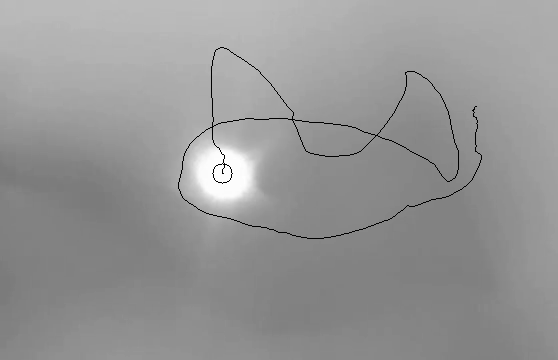

Video ended....
End of programm


In [ ]:
#add google drive to colab
from google.colab import drive
drive.mount('/gdrive') #name could be anything

#set working folder
%cd /gdrive/My Drive/Colab Notebooks/Ai learning/OpenCV practice 1

import cv2 #OpenCv work with images
import numpy as np #never used here

#cv2.imshow("Frame", frame)
#disabled in google colab so we import another function:
from google.colab.patches import cv2_imshow
#cv2_imshow(frame)
#it draws one frame, just like print('text')
#to not die under ton of screenshots
from google.colab import output
#output.clear()
#will delete picture before draw a new one
#to give programm time to draw a picture
import time
#time.sleep(1) to sleep for 1 sec
#but apparently cv2 has a function
#.waitKey() that used as delay
#it is lagging more,
#so i took more casual approach time.sleep()

#for easy result showing
def myShow(xFrame):
    '''shows video frame by frame'''
    output.clear()
    cv2_imshow(xFrame)
    time.sleep(0.05)
    #cv2.waitKey(50) # 33 мс сон (~30 кадров в секунду)

myVideo = "video_output.mp4"

#trajectory of white dot
#it will be a list, but list of "tuples"
centers = []

#open video
cap = cv2.VideoCapture(myVideo)
if not cap.isOpened():
    print("Error open video!")
    exit(1)

#show the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Video ended....")
        break
    #cv2.imshow("Frame", frame) #disabled in google colab
    #myShow(frame)

    #перевод изображения в черно-белое
    grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #myShow(grey)

    #использование функции threshold
    #для определения светлого пятна
    _, threshold = cv2.threshold(grey, thresh=210, maxval=255, type=cv2.THRESH_BINARY)
    #myShow(threshold)

    #определение центра масс пятна
    #M is a dictionary for mathematic Mambo-jambo
    #it works only with threshold: black and white, not grey
    M = cv2.moments(threshold)
    # вычисляете координаты центра масс
    cX = int( M["m10"] / M["m00"] )
    cY = int( M["m01"] / M["m00"] )

    #draw circle on image,
    #in this case Grey, but it works fine with original
    cv2.circle(grey, center=( cX, cY ), radius=10, color=-1, thickness=1)
    #myShow(grey)

    #добавляете координаты центра
    #светового пятна в список
    centers.append( ( cX, cY ) )

    #для каждого кадра рисуем
    #координаты центров с помощью line
    #isnt range starts with 0?
    #for i in range(1, len(centers)): #this was a BS, you need N-1 lines to connect dots
        #cv2.line(gray, centers[i-1], centers[i], color=0, thickness=1)
    for i in range( len(centers)-1 ): #need N-1 lines to connect dots
        cv2.line(grey, centers[i], centers[i+1], color=0, thickness=1)

    myShow(grey)
    #waitKey meant to work as time.sleep
    #cv2.waitKey(33) # 33 мс сон (~30 кадров в секунду)

cv2.waitKey(0) #waiting forever,
#but unclear for what
#i bet if it isnt mentioned
#must be Any Key
#and probably cv2 starts some window
#so it would be closed, who knows
cap.release()

#save last frame to file

#./folder/filename is relative path
#create file in mentioned folder in current dirrectory
#filename will create file in current folder we set by %cd
output_img = "./result/result.png"
image = grey
cv2.imwrite(output_img, image)

print("End of programm")

**open image from google drive**

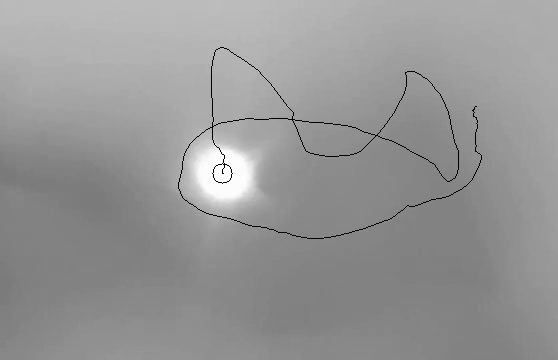

In [ ]:
path_to_img = "./result/result.png"
myImg = cv2.imread( path_to_img )
myShow( myImg )